## Observations and Insights

## Dependencies and starter code

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#%matplotlib inline

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

Data_combined_df = pd.merge(study_results, mouse_metadata, how = "left", on="Mouse ID" )
Data_combined_df.head()
#list(Data_df)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


mean = Data_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = Data_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = Data_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = Data_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = Data_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#DataFrame for Mean,Median,Variance,STD Dev, and SEM of Tumor Volume (TV) by drug Reg.
Sum_Stats_df = pd.DataFrame({"Mean TV": mean, "Median TV": median, 
                           "Variance TV": variances, "Std Dev TV": std_dev, 
                           "SEM TV": sem})
Sum_Stats_df
                   

,Mean TV,Median TV,Variance TV,Std Dev TV,SEM TV
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


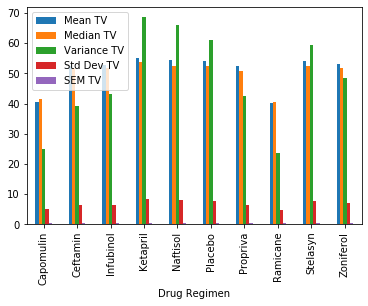

In [31]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#counts = Data_combined_df['Drug Regimen'].value_counts()
#counts.plot(kind = "bar", title = "Treatment Regimen Count")

Sum_Stats_df.plot.bar()



In [22]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#plt.bar("Drug Regimen")
#plt.show()

## Pie plots

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen